In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#PHASE 1: data collection
# --- Step 1: Define NSE and NYSE IT stocks ---
tickers_nse = ['INFY.NS', 'TCS.NS', 'WIPRO.NS', 'DRREDDY.NS', 'HCLTECH.NS']
tickers_nyse = ['MSFT', 'AAPL', 'CSCO', 'ORCL', 'IBM']

start = "2020-01-01"
end = "2025-05-01"
nse_data = yf.download(tickers_nse, start=start, end=end, group_by='ticker', auto_adjust=True)
nyse_data = yf.download(tickers_nyse, start=start, end=end, group_by='ticker', auto_adjust=True)
def extract_close(df, tickers):
    close_prices = pd.DataFrame()
    for ticker in tickers:
        if isinstance(df.columns, pd.MultiIndex):
            close_prices[ticker] = df[ticker]['Close']
        else:
            close_prices[ticker] = df['Close']
    return close_prices

nse_close = extract_close(nse_data, tickers_nse)
nyse_close = extract_close(nyse_data, tickers_nyse)
combined_prices = pd.concat([nse_close, nyse_close], axis=1, join='inner')
combined_prices.dropna(inplace=True)



print("Combined clean price data:\n")
print(combined_prices.head())


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed

Combined clean price data:

               INFY.NS       TCS.NS    WIPRO.NS  DRREDDY.NS  HCLTECH.NS  \
Date                                                                      
2020-01-02  650.128540  1935.550781  120.273315  558.482727  476.031219   
2020-01-03  660.127808  1974.124512  121.629608  562.186584  485.575928   
2020-01-06  653.800720  1973.945068  122.138199  561.202148  483.044434   
2020-01-07  644.111328  1978.789551  123.615578  562.245117  484.911957   
2020-01-08  635.527832  2023.104370  123.421837  564.789001  486.156921   

                  MSFT       AAPL       CSCO       ORCL         IBM  
Date                                                                 
2020-01-02  153.042297  72.620827  41.180763  49.642689  101.245117  
2020-01-03  151.136612  71.914810  40.508884  49.467854  100.437668  
2020-01-06  151.527313  72.487839  40.653461  49.725506  100.258240  
2020-01-07  150.145737  72.146912  40.389809  49.835930  100.325523  
2020-01-08  152.537292  73

c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this 

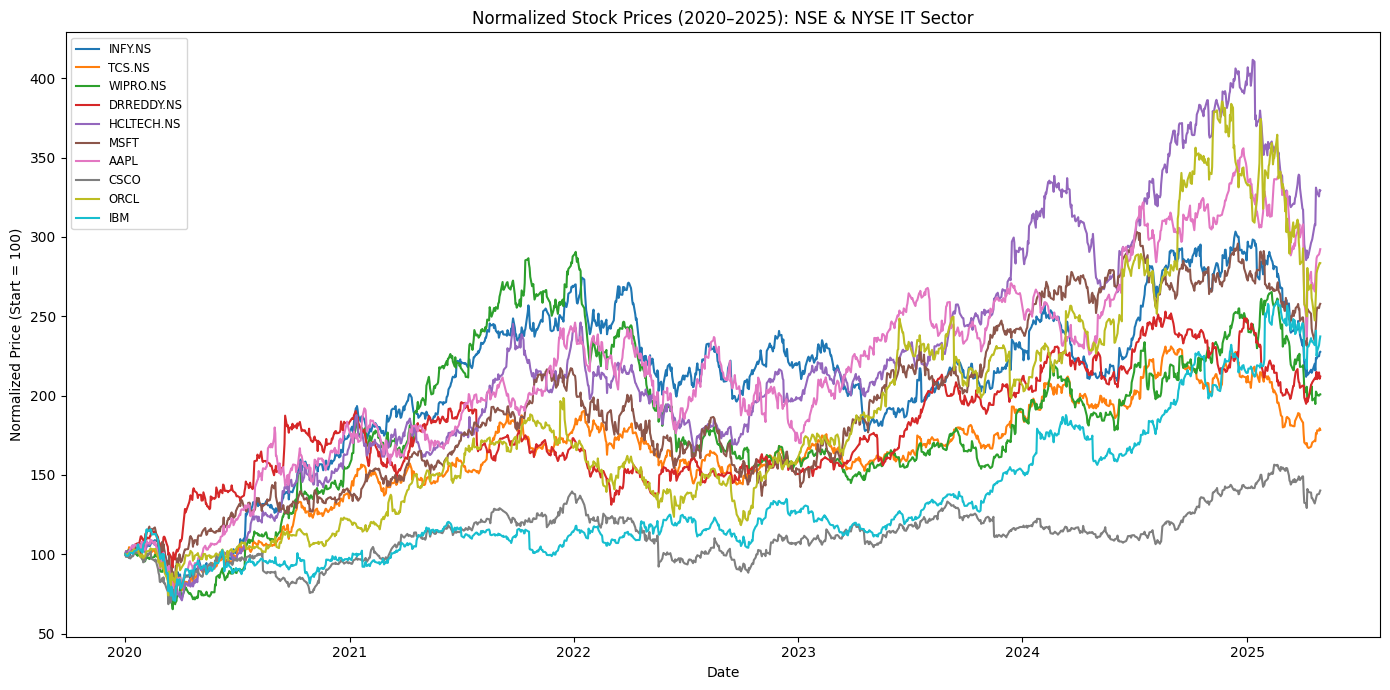

In [ ]:
# Normalize the prices to start at 100
normalized_prices = combined_prices / combined_prices.iloc[0] * 100

# Reset index for seaborn (it needs columns, not datetime index)
normalized_prices_reset = normalized_prices.reset_index().melt(id_vars='Date', 
                                                               var_name='Stock', 
                                                               value_name='Normalized Price')

#lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(data=normalized_prices_reset, x='Date', y='Normalized Price', hue='Stock')

plt.title("Normalized Stock Prices (2020–2025): NSE & NYSE IT Sector")
plt.xlabel("Date")
plt.ylabel("Normalized Price (Start = 100)")
plt.legend(loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this 

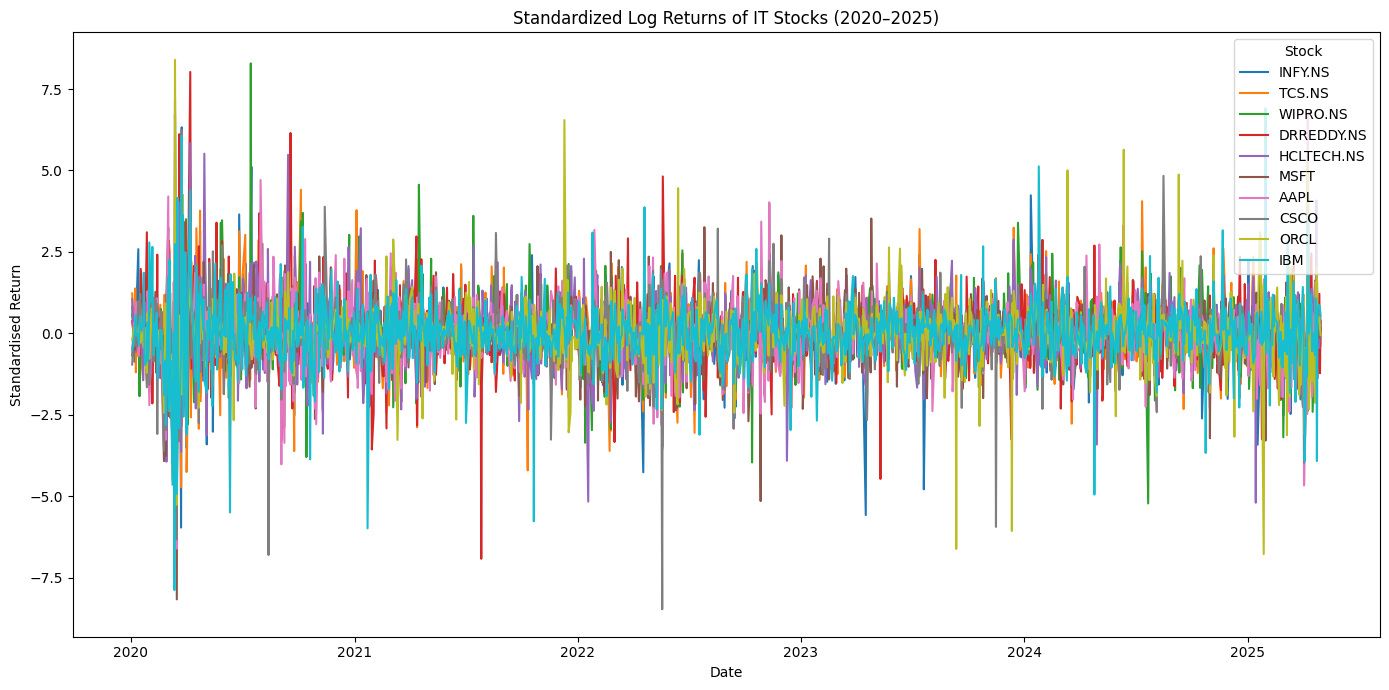

In [6]:
#PHASE 2: EDA
#log returns
returns = np.log(combined_prices/combined_prices.shift(1)).dropna()

scaler = StandardScaler()
returns_scaled = pd.DataFrame(scaler.fit_transform(returns),
                              columns = returns.columns,
                              index = returns.index)

#plotting the returns
returns_melted  = returns_scaled.reset_index().melt(id_vars = "Date",
                                                     var_name = "Stock",
                                                     value_name = "Standardised Return")

plt.figure(figsize = (14,7))
sns.lineplot(data = returns_melted, x = "Date", y = "Standardised Return", hue = "Stock")
plt.title("Standardized Log Returns of IT Stocks (2020–2025)")
plt.tight_layout()
plt.show()


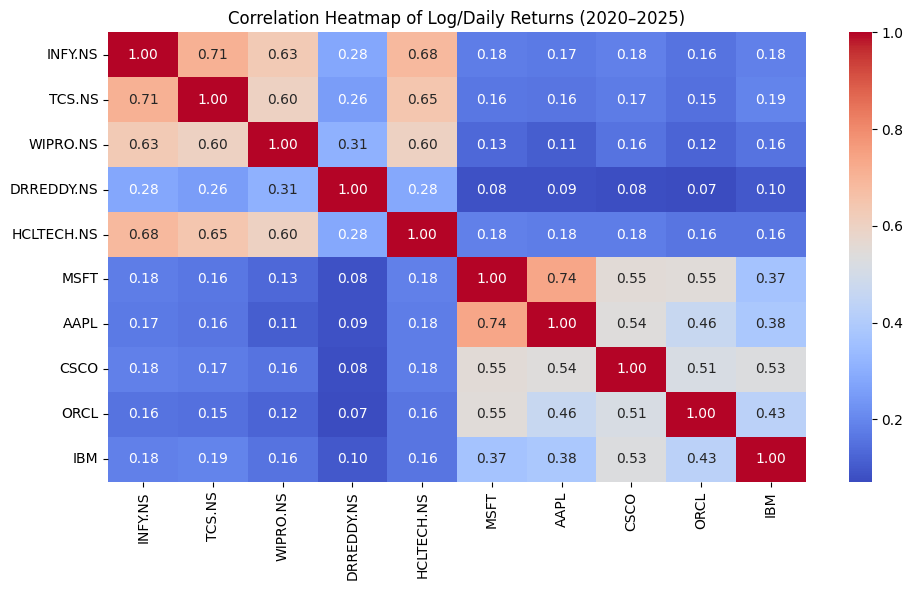

In [8]:
#PHASE 2: EDA(continued)
# Correlation heatmap
plt.figure(figsize = (10,6))
sns.heatmap(returns.corr(),annot = True,cmap = "coolwarm",fmt = ".2f")
plt.title("Correlation Heatmap of Log/Daily Returns (2020–2025)")
plt.tight_layout()
plt.show()


In [9]:
# Unstack and sort correlation matrix (excluding self-pairs)
corr_matrix = returns.corr().unstack().sort_values(ascending=False)

# Filter only cross-market pairs (NSE-NYSE)
nse_stocks = [s for s in returns.columns if '.NS' in s]
nyse_stocks = [s for s in returns.columns if '.NS' not in s]

cross_pairs = [(a, b) for a, b in corr_matrix.index if (a in nse_stocks and b in nyse_stocks)]
top_pairs = [(a, b, corr_matrix[(a, b)]) for a, b in cross_pairs[:5]]

print("Top 5 NSE-NYSE correlated stock pairs:")
for a, b, corr in top_pairs:
    print(f"{a} - {b}: {corr:.2f}")


Top 5 NSE-NYSE correlated stock pairs:
TCS.NS - IBM: 0.19
INFY.NS - IBM: 0.18
HCLTECH.NS - MSFT: 0.18
INFY.NS - CSCO: 0.18
HCLTECH.NS - CSCO: 0.18


The above results help us , a low or slight negative corelation helps us beeter in portfolio optimisation.This will reduce down the risk hence better investment
